<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395/477 Redes Neuronales Artificiales I-2018 </h1>

<H3 align='center'> Tarea 1 - Redes Neuronales y *Deep Learning* </H3>
<hr style="height:2px;border:none"/>

**Temas**  

* Entrenamiento de redes *Feed-Forward* vı́a GD y variantes (SGD, mini-*batches*), *momentum*, regularización y tasa de aprendizaje adaptiva.
* Rol de capas ocultas y mayor profundidad (*Deep Learning*).
* Diseño y entrenamiento de Redes Neuronales Convolucionales (CNNs).
* Aplicaciones de las Redes Neuronales Convolucionales
* Técnicas de regularización: *Dropout* y *Batch Normalization* 

** Formalidades **  
* Equipos de trabajo de: 2-3 personas (*cada uno debe estar en condiciones de realizar una presentación y discutir sobre cada punto del trabajo realizado*)
* Se debe preparar una presentación de 20 minutos. Presentador será elegido aleatoriamente.
* Se debe preparar un (breve) Jupyter/IPython notebook que explique la actividad realizada y las conclusiones del trabajo
* Fecha de entrega y discusión: 26 de Abril.
* Formato de entrega: envı́o de link Github al correo electrónico del ayudante (*<francisco.mena.13@sansano.usm.cl>*) , incluyendo al profesor en copia (*<jnancu@inf.utfsm.cl>*). Por favor especificar el siguiente asunto: [Tarea1-INF395-I-2019]

<hr style="height:2px;border:none"/>

#### Paquetes instalación

Para poder trabajar en el curso se necesitará instalar librerías para Python, por lo que se recomienda instalarlas a través de anaconda (para Windows y sistemas Unix) en un entorno virtual, donde podrán elegir su versión de Python. Se instalarán librerías como sklearn, una librería simple y de facil acceso para data science, keras en su versión con GPU (para cálculo acelerado a través de la tarjeta gráfica), además de que ésta utiliza como backend TensorFlow o Theano, por lo que habrá que instalar alguno de éstos, además de las librerías básicas de computer science como *numpy, matplotlib, pandas,* además de claramente *jupyter*.

* Descargar anacona
* Luego de instalar Anaconda y tenerla en el path de su computador crear un entorno virtual:
```
conda create -n redesneuronales python=version
```
con version, la version de Python que desea utilizar. Si está en Windows, se recomienda Python 3 debido a dependencias con una de las librerías a utilizar.

* Acceder al ambiente creado
```
source activate redesneuronales
```

* Instalar los paquetes a utilizar
```
conda install jupyter sklearn numpy pandas matplotlib keras-gpu tensorflow-gpu
```
O vía *pip*
```
pip install jupyter sklearn numpy pandas matplotlib tensorflow-gpu keras
```

*  Para salir del entorno
```
source deactivate redesneuronales
```

No olvide revisar las dependencias de las versiones de librerías, por ejemplo la de tensorflow-gpu: https://www.tensorflow.org/install/source#tested_source_configurations

<hr style="height:2px;border:none"/>
La tarea se divide en secciones:

[1.](#primero) Red Neuronal *Feed Forward* para Detectar Exoplanetas  
[2.](#segundo) *Deep Networks*  
[3.](#tercero) Redes Convolucionales en Imágenes  
[4.](#cuarto) CNN *vs* RNN Prediciendo el Ozono Atmosférico

#### <a id="primero"></a>
## 1. Red Neuronal *Feed Forward* para Detectar Exoplanetas
---

Las Redes Neuronales Artificiales (ANN) son un tipo de modelo de aprendizaje que, con el suficiente número de capas, debiera poder aproximar cualquier función. Hoy en día se han aplicado a numerosos problemas, ya que tienen la ventaja de ser bastante dinámicas en su construcción y poder ser entrenadas con unicamente *backpropagation*, obteniendo un buen desempeño. Los modelos de aprendizaje son aplicados a diferentes ámbitos en donde, en algunos casos, automatizan extensivos procesos manuales de expertos, como lo que veremos a continuación.

<img src="https://www.cfa.harvard.edu/~avanderb/tutorial/HAT-P-3b.gif" title="YOLO" width="30%"/>

En esta sección trabajaremos con un dataset de astronomía, **Kepler KOI** [[1]](#refs), en el cual podrán experimentar con la detección de exoplanetas a través de *features* extraídas de las curvas de luz (tránsito de los planetas sobre su estrella madre) y metadatos de la observación (planeta, estrella y curvas de luz). Para más información sobre los metadatos visite el siguiente __[link](https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html)__. La tarea es determinar si un posible candidato a exoplaneta (en base a una previa identificación/selección de eventos que sobrepasan un cierto *treshold*) corresponde efectivamente a un exoplaneta o no.

---
En primer lugar cargue todos los datos trabajados por [[2]](#refs), los cuales se encuentran adjuntados con el enunciado. Además separe en entrenamiento y pruebas.
```python
import pandas  as pd
import numpy as np
df_sets = pd.read_csv("./koi_sets_unb.csv")
mask_train = (df_sets["Set"] == "Train").values
mask_test = (df_sets["Set"] == "Test").values
df_labels = pd.read_csv("./koi_labels.csv")
df_X = pd.read_csv("./koi_light_curves_X.csv")
df_labels_train = df_labels[mask_train]
df_labels_test = df_labels[mask_test]
df_X_train = df_X[mask_train]
df_X_test = df_X[mask_test]
```

A continuación cree las matrices que trabajará y servirán para entrenar su modelo neuronal, la etiqueta binaria (0 o 1) y la matriz numérica de entrada, imputando el estadístico de la mediana sobre los valores nulos.
```python
y_train = ((df_labels_train["NExScI Disposition"]=="CONFIRMED")*1).values
y_test = ((df_labels_test["NExScI Disposition"]=="CONFIRMED")*1).values
df_X_train = df_X_train.reset_index(drop=True)
df_X_test = df_X_test.reset_index(drop=True)
df_X_train.fillna(df_X_train.median(), inplace=True)
df_X_test.fillna(df_X_test.median(), inplace=True)
X_train = df_X_train.values[:,1:]
X_test = df_X_test.values[:,1:]
```

> a) Explore los datos trabajados, ya sea con estadísticos simples o con gráficos como histogramas y/o boxplots. Comente sobre el problema enfrentado, es decir, la tarea de transformar un vector $X$ en un valor categórico (0 o 1).
```python
columns_names = df_X_train.columns[1:]
print(columns_names)
print(X_train.shape)
print(X_test.shape)
df_X_train.describe()
```

> b) Escale los datos para ser trabajados por el modelo de aprendizaje, indique la importancia de éste paso. Además cree un conjunto de validación extrayendo un cierto porcentaje del conjunto de entrenamiento, por ejemplo el 20% manteniendo el desbalanceo de clases (*split* stratificado).
```python
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = ...
X_test_scaled =  scaler.transform(X_test)
```

> c) Muestre en un gráfico la función objetivo (*cross entropy*) para el conjunto de entrenamiento y de validación *vs* número de *epochs* de entrenamiento, para una red *feedforward* de 3 capas, con 256 unidades ocultas y función de activación sigmoidal. Entrene la red usando gradiente descendente estocástico con tasa de aprendizaje (*learning rate*) 0.01 y 100 *epochs* de entrenamiento. Comente. Si observa divergencia durante el entrenamiento, determine si esto ocurre para cada repetición del experimento. Compare el efecto de variar la función de activación a **ReLU** ¿Qué observa en la convergencia del modelo?
```python
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
model.add(Dense(1, kernel_initializer='uniform',activation="sigmoid")) #this should be mantained
model.compile(optimizer=SGD(lr=0.01),loss='binary_crossentropy')
hist = model.fit(X_train_scaled, y_train, epochs=100, verbose=1, validation_data=(X_val_scaled, y_val))
```
> Finalmente compare a través de una métrica de desempeño sobre el conjunto de pruebas, en este caso como trabajamos un problema desbalanceado, mida *f1 score weighted*, comente sobre esta decisión ¿Es esperable la diferencia entre relu y sigmoidal en base a los gráficos realizados?
```python
from sklearn.metrics import f1_score
f1_score(y_test,model_sigmoid.predict_classes(X_test_scaled),average='weighted')
f1_score(y_test,model_relu.predict_classes(X_test_scaled),average='weighted')
```

> d) Repita c) variando la tasa de aprendizaje (*learning rate*) en un rango sensible. Comente. Si observa divergencia durante el entrenamiento, determine si esto ocurre para cada repetición del experimento o para alguna de las dos funciones de activación experimentadas.
```python
import numpy as np
n_lr = 20
lear_rate = np.linspace(0,1,n_lr)
```

> e) Entrene los modelos considerados en c) usando *progressive decay*. Compare y comente.
```python
n_decay = 10
lear_decay = np.logspace(-6,0,n_decay)
sgd = SGD(lr=0.2, decay=1e-6)
```

> f) Entrene los modelos considerados en c) usando *momentum* [[3]](#refs). Experimente usando *momentum* clásico y *momentum* de Nesterov. ¿Observa un mejor resultado final? ¿Observa una mayor velocidad de convergencia sobre el conjunto de entrenamiento? ¿Sobre el conjunto de validación?
```python
split_space = 21
momentum = np.linspace(0,1,split_space)
sgd = SGD(lr=0.01,momentum=0.9,nesterov=False)
```

> g) Vuelva a entrenar los modelos considerados en c) utilizando SGD en mini-*batches*. Experimente con diferentes tamaños del *batch*. Comente sobre eficacia de convergencia (converge en menor número de *epochs*) *vs* eficiencia computacional (tiempo en converger o por *epoch*).
```python
n_batches = 21
batch_sizes = np.round(np.linspace(1,X_train_scaled.shape[0],n_batches))
model.fit(X_train_scaled,y_train,batch_size=50,epochs=100,validation_data=(X_val_scaled, y_val))
```

> h) Entrene los modelos obtenidos en c) utilizando estrategias modernas para adaptar la tasa de aprendizaje. Compare los desempeños de *adagrad, adadelta, RMSprop* y *adam*, ofrecidos en __[keras optimizer](https://keras.io/optimizers/)__. ¿Se observa en algún caso un mejor resultado final? ¿Se observa en algún caso una mayor velocidad de convergencia sobre el dataset de entrenamiento? ¿Sobre el dataset de validación?
```python
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta
moptimizer = Adagrad(lr=0.01)
model.compile(optimizer=moptimizer)
model.fit(X_train_scaled,y_train,batch_size=bs,epochs=100,validation_data=(X_val_scaled, y_val))
```

> i) Entrene los modelos obtenidos en c) utilizando regularizadores clásicos $l_1$ y $l_2$ (*weight decay*). Compare los desempeños de prueba obtenidos antes y después de regularizar. Experimente con distintos valores del parámetro de regularización y comente. Además evalúe el efecto de regularizar solo la primera capa *vs* la segunda, comente. *Recuerde que la regularización se debe añadir a cada capa separadamente* ¿Dónde le parece más importante aplicar?
```python
from keras.layers import Activation
from keras.regularizers import l1,l2
model = Sequential()
model.add(Dense(256,input_dim=X_train_scaled.shape[1],kernel_initializer='uniform',kernel_regularizer=l2(0.01)))
model.add(Activation('sigmoid')) #and relu
model.add(Dense(1, kernel_initializer='uniform',kernel_regularizer=l2(0.01)))
model.add(Activation('sigmoid'))
```

> j) Elija uno de los dos modelos definidos en c) y experimente con modificar la función objetivo, que hasta ahora se lo hemos dejado a keras definir la típica *binary cross entropy*, en pos de algún objetivo que decida plantearse, por ejemplo aumentar la velocidad de convergencia (reducir más rápida la función objetivo), obtener mejor desempeño en *f1 score* u algún otro.  
*Se dejan algunos ejemplos*
1. Focal loss [[4]](#refs)
2. Cross entropy + Min entropy
3. Cross entropy + Max entropy
4. Kullback Leibler (KL) ó Jensen Shannon (JS) divergence [[5]](#refs)  
5. Weighted Cross entropy  
```python
from keras import backend as K
def custom_loss(value): #ejemplo
    def loss(y_true, y_pred):
        y_true = K.clip(y_true, K.epsilon(), 1) 
        y_pred = K.clip(y_pred, K.epsilon(), 1)
        return K.sum(y_true * K.log(y_true / y_pred), axis=-1) #KL-divergence
        ...#return value*K.mean(K.square(y_pred - y_true), axis=-1) #MSE
    return loss
model.compile(loss=custom_loss(1),optimizer=opt) #example of use
```

-----------------------

### Desarrollo

#### Carga Inicial de Datos

Se realiza la carga inicial de los datos utilizando el código proveido en el enunciado.

In [1]:
import pandas  as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import random as rand
from sklearn.preprocessing import StandardScaler
import warnings
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from sklearn.metrics import f1_score
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta
from keras.layers import Activation
from keras.regularizers import l1,l2
warnings.filterwarnings('ignore')
%matplotlib inline

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

from keras import backend as K
K.tensorflow_backend._get_available_gpus()

df_sets = pd.read_csv("./koi_sets_unb.csv")
mask_train = (df_sets["Set"] == "Train").values
mask_test = (df_sets["Set"] == "Test").values
mask_clean = (df_sets["Set"] != "Unlabeled").values
df_labels = pd.read_csv("./koi_labels.csv")
df_X = pd.read_csv("./koi_light_curves_X.csv")
df_labels_train = df_labels[mask_train]
df_labels_test = df_labels[mask_test]
df_X_train = df_X[mask_train]
df_X_test = df_X[mask_test]
df_X_clean = df_X[mask_clean]

y_train = ((df_labels_train["NExScI Disposition"]=="CONFIRMED")*1).values
y_test = ((df_labels_test["NExScI Disposition"]=="CONFIRMED")*1).values
df_X_train = df_X_train.reset_index(drop=True)
df_X_test = df_X_test.reset_index(drop=True)
df_X_train.fillna(df_X_train.median(), inplace=True)
df_X_test.fillna(df_X_test.median(), inplace=True)
X_train = df_X_train.values[:,1:]
X_test = df_X_test.values[:,1:]

Using TensorFlow backend.


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6113823932202434410
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3150367948
locality {
  bus_id: 1
  links {
  }
}
incarnation: 8594020842223423978
physical_device_desc: "device: 0, name: GeForce GTX 1050 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


#### a) Análisis Exploratorio

Se pide realizar un análisis estadístico de caracter exploratorio a los valores que toman las columnas de las cuales se alimentarán posteriormente las neuronas de la capa input, esto con el fin de determinar el comportamiento y la posible existencia de outliers que puedan dificultar o ensuciar el proceso de aprendizaje

In [2]:
df_X_clean.shape

(6257, 42)

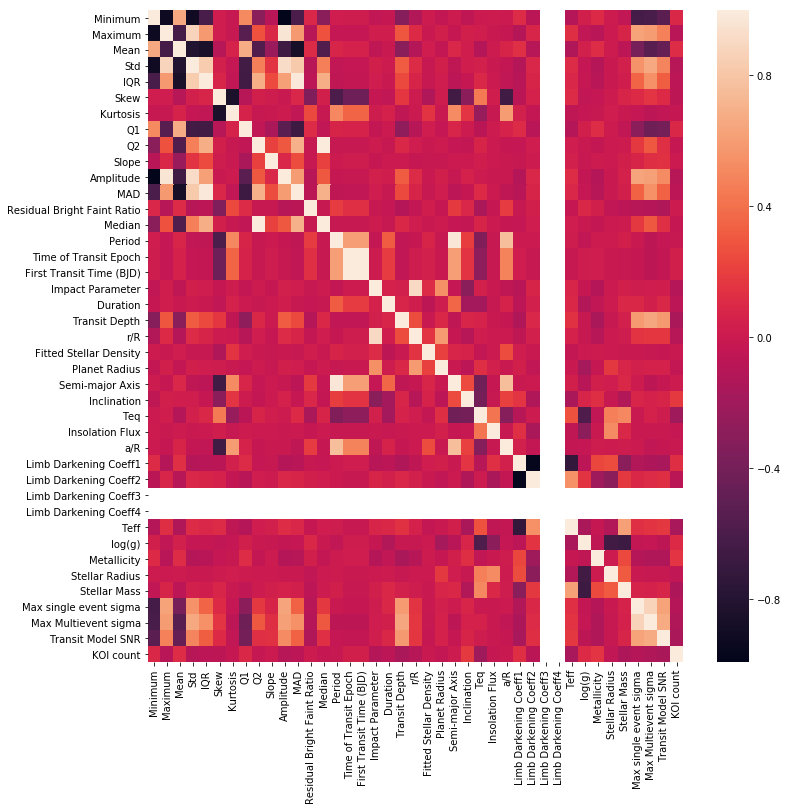

In [3]:
plt.subplots(figsize = (12,12))
sn.heatmap(df_X_clean.corr())

In [4]:
print(df_X_clean["Limb Darkening Coeff3"].value_counts())
print(df_X_clean["Limb Darkening Coeff4"].value_counts())

0.0    6257
Name: Limb Darkening Coeff3, dtype: int64
0.0    6257
Name: Limb Darkening Coeff4, dtype: int64


Text(0.5, 1.0, 'Transit Model SNR')

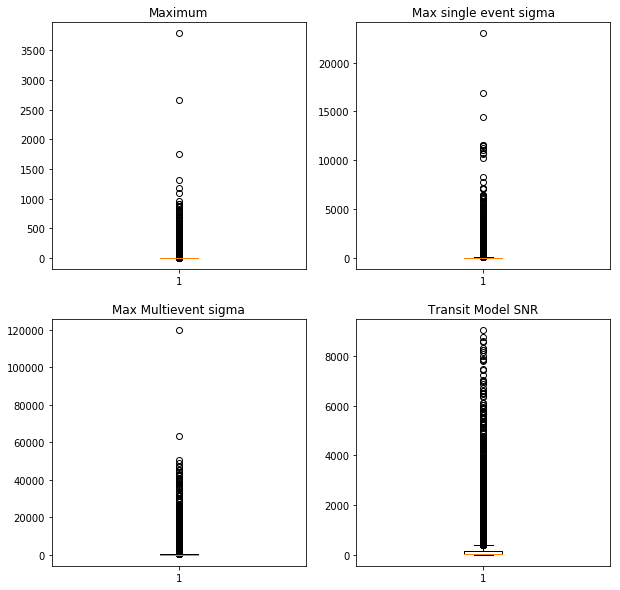

In [5]:
figs, axs = plt.subplots(2,2, figsize = (10,10))
axs[0,0].boxplot(df_X_clean["Maximum"])
axs[0,0].set_title("Maximum")
axs[0,1].boxplot(df_X_clean["Max single event sigma"])
axs[0,1].set_title("Max single event sigma")
axs[1,0].boxplot(df_X_clean["Max Multievent sigma"])
axs[1,0].set_title("Max Multievent sigma")
axs[1,1].boxplot(df_X_clean["Transit Model SNR"])
axs[1,1].set_title("Transit Model SNR")

In [6]:
df_X_clean.describe()

,Minimum,Maximum,Mean,Std,IQR,Skew,Kurtosis,Q1,Q2,Slope,...,Limb Darkening Coeff4,Teff,log(g),Metallicity,Stellar Radius,Stellar Mass,Max single event sigma,Max Multievent sigma,Transit Model SNR,KOI count
count,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000,6.257000e+03,...,6257.0,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000
mean,-55.439395,19.786534,-0.122185,3.454672,0.274637,-9.222270,201.916935,-0.090383,0.013234,7.155304e-08,...,0.0,5712.282324,4.313322,-0.126175,1.745801,1.020812,229.038539,1349.241810,362.052365,1.437430
std,240.990512,98.009986,0.448081,15.911548,1.802055,8.881251,536.303028,0.400152,0.318824,6.568926e-06,...,0.0,813.289861,0.433182,0.279919,6.385349,0.350569,876.758204,4766.072946,934.412526,0.927327
min,-8446.637695,0.000000,-13.658888,0.000000,0.000000,-117.225060,-3.000000,-11.479470,-1.961110,-1.280449e-04,...,0.0,2661.000000,0.047000,-1.980000,0.116000,0.000000,2.539000,7.105000,0.000000,1.000000
25%,-6.151650,0.163160,-0.025963,0.051939,0.002580,-11.585481,17.942055,-0.013380,-0.001710,-3.793189e-08,...,0.0,5327.000000,4.221000,-0.260000,0.829000,0.843000,4.230000,13.315000,17.900000,1.000000
50%,-1.559600,0.421430,-0.008539,0.103880,0.009190,-6.854079,56.563348,-0.003760,0.000000,0.000000e+00,...,0.0,5774.000000,4.438000,-0.100000,1.000000,0.972000,6.331000,26.276000,37.200000,1.000000
75%,-0.623520,1.775140,-0.003134,0.371883,0.026625,-3.848331,162.279139,-0.000380,0.000000,4.189988e-08,...,0.0,6108.000000,4.542000,0.070000,1.334000,1.098000,36.466000,178.316000,157.200000,1.000000
max,0.000000,3780.657715,0.000000,686.443909,76.330341,16.964659,16951.279152,5.092345,15.002840,1.998463e-04,...,0.0,15896.000000,5.283000,0.560000,229.908000,3.735000,22982.162000,120049.680000,9054.700000,7.000000


In [7]:
print(df_X_train.shape)
print(df_X_test.shape)

(4692, 42)
(1565, 42)


#### b) Escalamiento de datos



In [8]:
def randomSampler(data, y):
    marks = np.zeros(data.shape[0], dtype = bool)
    for i in range(int(data.shape[0]*0.2)):
        candidate = rand.randint(0, data.shape[0] - 1)
        while(marks[candidate]):
            candidate = rand.randint(0, data.shape[0] - 1)
        marks[candidate] = True
    not_marks = np.invert(marks)
    return data[not_marks], y[not_marks], data[marks], y[marks] 
        

X_train, y_train, X_val, y_val = randomSampler(X_train, y_train)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
scaler.fit(X_val)
X_val_scaled = scaler.transform(X_val)
scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

#### c) Cross Entropy

In [19]:
def makeFFNN(model, act_method, verbosity = 1,
             learning_rate=0.01, decay_val=0, momentum_val = 0,
             nesterov_val = False, bsizes = False, data = {
    "X_train": X_train_scaled,
    "X_val": X_val_scaled,
    "y_train": y_train,
    "y_val": y_val
}):
    model.add(Dense(256, input_dim=data["X_train"].shape[1], kernel_initializer='uniform',activation=act_method))
    model.add(Dense(1, kernel_initializer='uniform',activation="sigmoid")) #this should be mantained
    model.compile(optimizer=SGD(lr=learning_rate, decay=decay_val, momentum = momentum_val, nesterov = nesterov_val),loss='binary_crossentropy')
    batchs = None
    if(bsizes):
        batchs = bsizes
    return model.fit(data["X_train"], data["y_train"], epochs=100, batch_size = batchs, verbose=verbosity, validation_data=(data["X_val"], data["y_val"]))

In [20]:
model_sigmoid = Sequential()
hist_sigmoid = makeFFNN(model_sigmoid, "sigmoid")

Train on 3754 samples, validate on 938 samples
Epoch 1/100
3754/3754 [==============================] - 1s 247us/step - loss: 0.6703 - val_loss: 0.6379
Epoch 2/100
3754/3754 [==============================] - 1s 137us/step - loss: 0.6572 - val_loss: 0.6299
Epoch 3/100
3754/3754 [==============================] - 1s 134us/step - loss: 0.6472 - val_loss: 0.6186
Epoch 4/100
3754/3754 [==============================] - 1s 136us/step - loss: 0.6364 - val_loss: 0.6091
Epoch 5/100
3754/3754 [==============================] - 1s 135us/step - loss: 0.6233 - val_loss: 0.5938
Epoch 6/100
3754/3754 [==============================] - 1s 134us/step - loss: 0.6081 - val_loss: 0.5950
Epoch 7/100
3754/3754 [==============================] - 1s 136us/step - loss: 0.5902 - val_loss: 0.5606
Epoch 8/100
3754/3754 [==============================] - 0s 130us/step - loss: 0.5708 - val_loss: 0.5420
Epoch 9/100
3754/3754 [==============================] - 1s 141us/step - loss: 0.5503 - val_loss: 0.5224
Epoch 10

Epoch 78/100
3754/3754 [==============================] - 1s 195us/step - loss: 0.2698 - val_loss: 0.2866
Epoch 79/100
3754/3754 [==============================] - 1s 170us/step - loss: 0.2691 - val_loss: 0.2798
Epoch 80/100
3754/3754 [==============================] - 1s 177us/step - loss: 0.2685 - val_loss: 0.2830
Epoch 81/100
3754/3754 [==============================] - 1s 139us/step - loss: 0.2683 - val_loss: 0.2866
Epoch 82/100
3754/3754 [==============================] - 1s 141us/step - loss: 0.2675 - val_loss: 0.2786
Epoch 83/100
3754/3754 [==============================] - 1s 135us/step - loss: 0.2677 - val_loss: 0.2828
Epoch 84/100
3754/3754 [==============================] - 1s 134us/step - loss: 0.2675 - val_loss: 0.2835
Epoch 85/100
3754/3754 [==============================] - 1s 149us/step - loss: 0.2670 - val_loss: 0.2822
Epoch 86/100
3754/3754 [==============================] - 1s 186us/step - loss: 0.2667 - val_loss: 0.2858
Epoch 87/100
3754/3754 [======================

In [21]:
model_relu = Sequential()
hist_relu = makeFFNN(model_relu, "relu")

Train on 3754 samples, validate on 938 samples
Epoch 1/100
3754/3754 [==============================] - 1s 381us/step - loss: 0.6475 - val_loss: 0.6015
Epoch 2/100
3754/3754 [==============================] - 1s 185us/step - loss: 0.5813 - val_loss: 0.5414
Epoch 3/100
3754/3754 [==============================] - 1s 188us/step - loss: 0.5276 - val_loss: 0.4892
Epoch 4/100
3754/3754 [==============================] - 1s 225us/step - loss: 0.4776 - val_loss: 0.4422
Epoch 5/100
3754/3754 [==============================] - 1s 161us/step - loss: 0.4320 - val_loss: 0.4023
Epoch 6/100
3754/3754 [==============================] - 1s 142us/step - loss: 0.3937 - val_loss: 0.3709
Epoch 7/100
3754/3754 [==============================] - 1s 137us/step - loss: 0.3636 - val_loss: 0.3477
Epoch 8/100
3754/3754 [==============================] - 0s 124us/step - loss: 0.3407 - val_loss: 0.3302
Epoch 9/100
3754/3754 [==============================] - 0s 132us/step - loss: 0.3231 - val_loss: 0.3172
Epoch 10

Epoch 78/100
3754/3754 [==============================] - 0s 131us/step - loss: 0.2224 - val_loss: 0.2487
Epoch 79/100
3754/3754 [==============================] - 0s 131us/step - loss: 0.2221 - val_loss: 0.2490
Epoch 80/100
3754/3754 [==============================] - 0s 131us/step - loss: 0.2218 - val_loss: 0.2488
Epoch 81/100
3754/3754 [==============================] - 0s 128us/step - loss: 0.2214 - val_loss: 0.2478
Epoch 82/100
3754/3754 [==============================] - 0s 131us/step - loss: 0.2211 - val_loss: 0.2483
Epoch 83/100
3754/3754 [==============================] - 0s 128us/step - loss: 0.2206 - val_loss: 0.2473
Epoch 84/100
3754/3754 [==============================] - 1s 137us/step - loss: 0.2203 - val_loss: 0.2473
Epoch 85/100
3754/3754 [==============================] - 1s 144us/step - loss: 0.2200 - val_loss: 0.2480
Epoch 86/100
3754/3754 [==============================] - 0s 126us/step - loss: 0.2196 - val_loss: 0.2480
Epoch 87/100
3754/3754 [======================

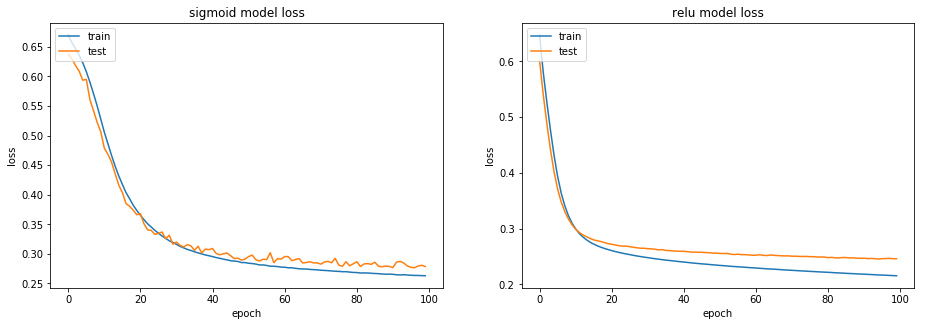

In [22]:
plt.figure(1)

plt.subplot(121)
plt.plot(hist_sigmoid.history['loss'])
plt.plot(hist_sigmoid.history['val_loss'])
plt.title('sigmoid model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(122)
plt.plot(hist_relu.history['loss'])
plt.plot(hist_relu.history['val_loss'])
plt.title('relu model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplots_adjust(top=1, bottom=0.08, left=0, right=2, hspace=0.25,
                    wspace=0.2)

In [23]:
print("Sigmoid score:", f1_score(y_test,model_sigmoid.predict_classes(X_test_scaled),average='weighted'))
print("RELU score:", f1_score(y_test,model_relu.predict_classes(X_test_scaled),average='weighted'))

Sigmoid score: 0.8400973008705633
RELU score: 0.8549004170938267


In [33]:
def ffnninteractive(activation, learning_rate, decay=0, momentum=0, nesterov=False, batch_size = False, verbose = 0):
    model = Sequential()
    hist_model = makeFFNN(model, activation, verbosity=verbose, learning_rate=learning_rate, decay_val = decay, bsizes = batch_size)
    
    plt.figure()
    plt.plot(hist_model.history['loss'])
    plt.plot(hist_model.history['val_loss'])
    plt.title(f'{activation} model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    
    print("F1 score:", f1_score(y_test,model.predict_classes(X_test_scaled),average='weighted'))

In [36]:
interact(ffnninteractive, activation=["sigmoid", "relu"], learning_rate= widgets.FloatSlider(min=0.05,max=1,step=0.05,value=0.2, continuous_update=False), decay=fixed(0), momentum=fixed(0), nesterov=fixed(False), batch_size = fixed(False), verbose=widgets.SelectionSlider(options=[0,1], value=0))

interactive(children=(Dropdown(description='activation', options=('sigmoid', 'relu'), value='sigmoid'), FloatS…

<function __main__.ffnninteractive(activation, learning_rate, decay=0, momentum=0, nesterov=False, batch_size=False, verbose=0)>

In [37]:
interact(ffnninteractive, activation=["sigmoid", "relu"], learning_rate= fixed(0.2), decay = widgets.FloatLogSlider(min=-6,max=0,base=10,step=1,value=-6, continuous_update=False), momentum = fixed(0), nesterov = fixed(False), batch_size = fixed(False), verbose=widgets.SelectionSlider(options=[0,1], value=0))

interactive(children=(Dropdown(description='activation', options=('sigmoid', 'relu'), value='sigmoid'), FloatL…

<function __main__.ffnninteractive(activation, learning_rate, decay=0, momentum=0, nesterov=False, batch_size=False, verbose=0)>

In [38]:
interact(ffnninteractive, activation=["sigmoid", "relu"], learning_rate= fixed(0.01), decay = fixed(0), momentum = widgets.FloatSlider(min=0,max=0.95,step=0.5,value=0.9, continuous_update=False), nesterov = False, batch_size = fixed(False), verbose=widgets.SelectionSlider(options=[0,1], value=0))

interactive(children=(Dropdown(description='activation', options=('sigmoid', 'relu'), value='sigmoid'), FloatS…

<function __main__.ffnninteractive(activation, learning_rate, decay=0, momentum=0, nesterov=False, batch_size=False, verbose=0)>

In [43]:
interact(ffnninteractive, activation=["sigmoid", "relu"], learning_rate= fixed(0.01), decay = fixed(0), momentum = fixed(0), nesterov = fixed(False), batch_size = widgets.SelectionSlider(options = np.round(np.linspace(1,X_train_scaled.shape[0],21)).astype(int), value = 3754, continuous_update = False), verbose=widgets.SelectionSlider(options=[0,1], value=1))

interactive(children=(Dropdown(description='activation', options=('sigmoid', 'relu'), value='sigmoid'), Select…

<function __main__.ffnninteractive(activation, learning_rate, decay=0, momentum=0, nesterov=False, batch_size=False, verbose=0)>

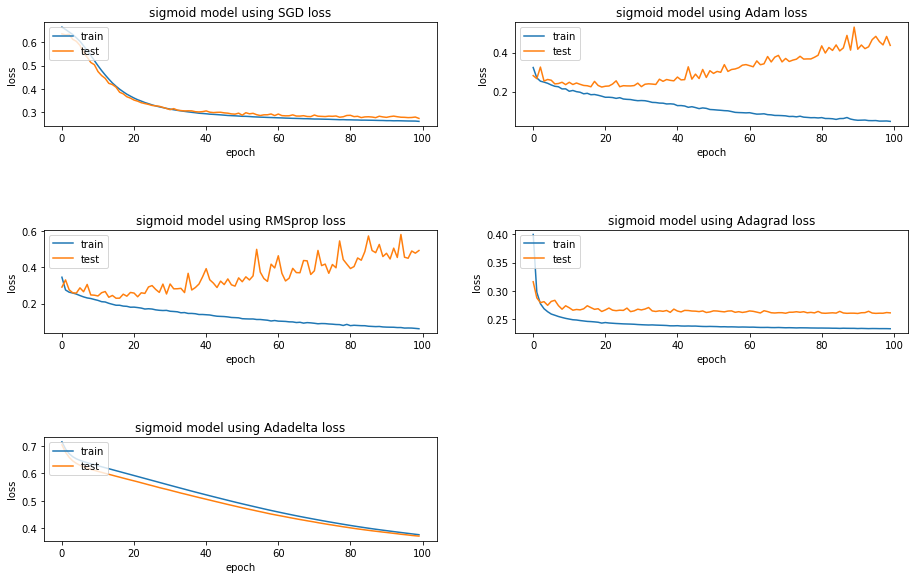

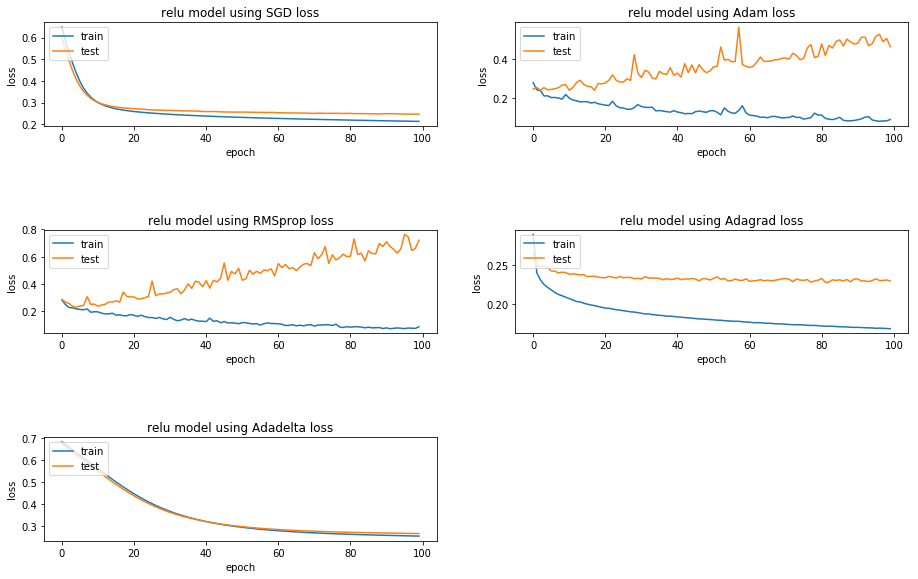

In [60]:
def optiFFNN(model, act_method, verbosity = 1,
             learning_rate=0.01, moptimizer = SGD, data = {
    "X_train": X_train_scaled,
    "X_val": X_val_scaled,
    "y_train": y_train,
    "y_val": y_val
}):
    model.add(Dense(256, input_dim=data["X_train"].shape[1], kernel_initializer='uniform',activation=act_method))
    model.add(Dense(1, kernel_initializer='uniform',activation="sigmoid")) #this should be mantained
    model.compile(optimizer=moptimizer(lr=learning_rate),loss='binary_crossentropy')
    return model.fit(data["X_train"], data["y_train"], epochs=100, verbose=verbosity, validation_data=(data["X_val"], data["y_val"]))

fig = 1
for activation in ["sigmoid", "relu"]:
    plt.figure(fig)
    index = 1
    for opti in [SGD, Adam, RMSprop, Adagrad, Adadelta]:
        model = Sequential()
        histo = optiFFNN(model, activation, moptimizer = opti, verbosity = 0)
        score = f1_score(y_test,model.predict_classes(X_test_scaled),average='weighted')

        position = f"32{index}"
        plt.subplot(int(position))
        plt.plot(histo.history['loss'])
        plt.plot(histo.history['val_loss'])
        plt.title(f'{activation} {opti.__name__} model loss. Score: {score}')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        
        index += 1
    fig += 1
    plt.subplots_adjust(top=2, bottom=0.2, left=0, right=2, hspace=1,
                        wspace=0.2)

In [64]:
def reguFFNN(model, act_method, verbosity = 1,
             learning_rate=0.01, regul_l1 = None, regul_l2 = None, data = {
    "X_train": X_train_scaled,
    "X_val": X_val_scaled,
    "y_train": y_train,
    "y_val": y_val
}):
    model.add(Dense(256,input_dim=X_train_scaled.shape[1],kernel_initializer='uniform',kernel_regularizer=regul_l1))
    model.add(Activation(act_method))
    model.add(Dense(1, kernel_initializer='uniform',kernel_regularizer=regul_l2))
    model.add(Activation('sigmoid'))
    model.compile(optimizer=SGD(lr=learning_rate),loss='binary_crossentropy')
    return model.fit(data["X_train"], data["y_train"], epochs=100, verbose=verbosity, validation_data=(data["X_val"], data["y_val"]))

fig = 1
for activation in ["sigmoid", "relu"]:
    plt.figure(fig)
    index = 1
    for layer1 in [None, l1(0.01), l2(0.01)]:
        for layer2 in [None, l1(0.01), l2(0.01)]:
            model = Sequential()
            histo = reguFFNN(model, activation, regul_l1 = layer1, regul_l2 = layer2, verbosity = 0)
            score = f1_score(y_test,model.predict_classes(X_test_scaled),average='weighted')

            str1 = f"{layer1.__class__.__name__}" if (layer1) else "no"
            str2 = f"{layer2.__class__.__name__}" if (layer2) else "no"
            position = f"33{index}"
            plt.subplot(int(position))
            plt.plot(histo.history['loss'])
            plt.plot(histo.history['val_loss'])
            plt.title(f'{activation} with {str1} layer 1 and {str2} layer 2 model loss\nScore:{score}')
            plt.ylabel('loss')
            plt.xlabel('epoch')
            plt.legend(['train', 'test'], loc='upper left')

            index += 1
    fig += 1
    plt.subplots_adjust(top=2, bottom=0.2, left=0, right=2, hspace=1,
                        wspace=0.2)

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

<a id="segundo"></a>

## 2. Deep Networks
---
Las *deep network*, o lo que hoy en día se conoce como *deep learning*, hace referencia a modelos de redes neuronales estructurados con muchas capas, es decir, el cómputo de la función final es la composición una gran cantidad de funciones ( $f^{(n)} = f^{(n-1)} \circ f^{(n-2)} \circ \cdots \circ f^{(2)} \circ f^{(1)} $ con $n \gg 0$ ).  
Este tipo de redes neuronales tiene una gran cantidad de parámetros, creciendo exponencialmente por capa con las redes *feed forward*, siendo bastante difíciles de entrenar comparadas con una red poco profunda, esto es debido a que requieren una gran cantidad de datos para ajustar correctamente todos esos parámetros. Pero entonces ¿Cuál es el beneficio que tienen este tipo de redes? ¿Qué ganancias trae el añadir capas a una arquitectura de una red neuronal?   Y luego, lo más importante ¿Cómo entrenamos este tipo de redes?

<img src="http://neuralnetworksanddeeplearning.com/images/tikz36.png" title="Title text" width="80%" height="20%" />



En esta sección se estudiará la complejidad de entrenar redes neuronales profundas, mediante la visualización de los gradientes de los pesos en cada capa, el cómo varía mientras se hace el *backpropagation* hacia las primeras capas de la red. Además del efecto del cambio de funciones de activación.

---

Volveremos a trabajar con el dataset de exoplanetas de la [sección 1](#primero). Cárguelo y genere las matrices a trabajar.

> a) En esta primera instancia se trabajará con una red *shallow* (poco profunda) con una gran cantidad de neuronas situadas en una capa, inicializada con pesos uniforme. Visualice el gradiente de la función de pérdida (*loss*) para el conjunto de entrenamiento (promedio del gradiente de cada dato) respecto a los pesos en las distintas capas, para esto se le pedirá el cálculo del gradiente para una capa mediante la función de *gradients* (__[link](https://www.tensorflow.org/api_docs/python/tf/keras/backend/gradients)__) en el *backend* de Keras, otra opción es a través de un __[monitor](https://keras.io/callbacks/#tensorboard)__. Deberá generar un **histograma** para todos los pesos de cada capa antes y despues del entrenamiento con 50 *epochs*. Comente.
```python
model = Sequential()
model.add(Dense(1280, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='uniform',activation='sigmoid'))
compilar
- ###calculate gradients
from keras import backend as K
import tensorflow as tf
loss = keras.losses.mean_squared_error(model.output,y_train_scaled)
listOfVariableTensors = model.trainable_weights 
gradients = K.gradients(loss, listOfVariableTensors) #We can now calculate the gradients.
sess = K.get_session()
evaluated_gradients = sess.run(gradients,feed_dict={model.input:X_train_scaled.values})
evaluated_gradients = [gradient/len(y_train) for gradient in evaluated_gradients]
```

> b) Vuelva a generar los histogramas para los gradientes de los pesos de cada capa antes y después del entrenamiento pero ahora entrenando una red con los mimos pesos distribuidos a través de muchas más capas (red profunda de 6 capas), 5 capas escondidas y 1 de salida. Utilice el inicializador de pesos *uniform* el cual inicializa mediante una distribución uniforme entre $-1/\sqrt{N}$ y $1/\sqrt{N}$ para cada capa, con $N$ el número de neuronas de la capa anterior. Por simplicidad visualice las 3-4 primeras capas de la red. Comente si observa el efecto del *gradiente desvaneciente* antes y/o después de entrenar. ¿Qué sucede con la *loss*? ¿El modelo logra aprender?
```python
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(256, kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(256, kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(256, kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(256, kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='uniform',activation='sigmoid'))
sgd = SGD(lr=0.01)
compilar
```

> c) Vuelva a generar los histogramas para los gradientes de los pesos de cada capa antes y después del entrenamiento, pero ahora entrenando la red profunda con el inicializador de Glorot [[6]](#refs), es decir, una distribución uniforme entre -$\sqrt{6/(N_{in}+N_{out})}$  y $\sqrt{6/(N_{in}+N_{out})}$ . Por simplicidad visualice las 3-4 primeras capas de la red. Comente si el efecto del *gradiente desvaneciente* se amortigua antes y/o después de entrenar. ¿Qué sucede ahora con la *loss*? ¿El modelo logra aprender?
```python
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(256, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(256, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(256, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(256, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='glorot_uniform',activation='sigmoid'))
sgd = SGD(lr=0.01)
compilar
```

> d) Vuelva a repetir la experimentación ahora cambiando la función de activación por ReLU, es decir, deberá visualizar los gradientes de los pesos de cada capa antes y después del entrenamiento, con inicialización *uniform*, y comparar con la inicialización de He [[7]](#refs), es decir, una distribución uniforme entre -$\sqrt{6/N_{in}}$ y $\sqrt{6/N_{in}} $. Comente si ocurre el mismo fenómeno anterior (para función sigmoidal) sobre el efecto del *gradiente desvaneciente* para la función ReLU. Explique la importancia de la inicialización de los pesos dependiendo de la arquitectura. 
```python
...
model.add(Dense(nh, kernel_initializer='uniform',activation='relu')) #uniform
...
or
...
model.add(Dense(nh, kernel_initializer='he_uniform',activation='relu')) #he
...
```

> e) Experimente con la utilización de una función activación auxiliar (debido a que aproxima) a '**ReLU**' y que es continua derivable (**softplus**) ¿Cuál es el beneficio de ésta con respecto ReLU? Comente.
```python
...
model.add(Dense(nh, kernel_initializer='he_uniform',activation='softplus')) #softplus
...
```

> f) ¿Qué es lo que sucede con la red más profunda? ¿El modelo logra convergencia en su entrenamiento? Vuelva a experimentar con variar las funciones de activación con el propósito de lograr un buen aprendizaje y generalización del modelo en base a la *loss*. Experimente con la familia ReLU (LeakyReLU, PReLU, ELU, ThresholdedReLU), algunas en el __[link](https://keras.io/layers/advanced-activations/)__. ¿Con cuál se aprende más rápido en términos de la *loss*? Además monitoree neuronas muertas (*dying neuron*) a través de los valores de la activación (por ejemplo ReLU con valor 0 no genera gradiente) con un histograma a lo largo del entrenamiento.  
*Hint: ésto último se puede visualizar con lo de la pregunta b), __[TensorBoard](https://keras.io/callbacks/#tensorboard)__*.
```python
from keras.layers import LeakyReLU, PReLU, ELU, ThresholdedReLU
LeakyReLU(alpha=0.3)
PReLU(alpha_initializer='zeros')
ELU(alpha=1.0)
ThresholdedReLU(theta=1.0)
...
model.add(Dense(nh, activation='linear'))
model.add(LeakyReLU(alpha=0.3))
...
```
¿Las funciones de activaciones de cada capa necesariamente deben ser iguales? Comente sobre su respuesta.

> g) Ahora, sin variar la profundidad de la red definida en b), se pedirá que experimente con otra variación que podría resultar provechoso para la generalización y aprendizaje del modelo, la técnica de *Dropout* [[8]](#refs) y la técnica de *Batch Normalization*[[9]](#refs). Decida si colocarlas en todas las capas o en algunas. Comente sobre el efecto esperado y el observado.
```python
from keras.layers import Dropout, BatchNormalization
...
model.add(Dense(nh, activation=act, kernel_initializer=init))
model.add(Dropout(dropout_rate))
...
...
model.add(Dense(nh, activation=act, kernel_initializer=init))
model.add(BatchNormalization())
...
```

<a id="tercero"></a>
## 3. Redes Convolucionales en Imágenes
---

En esta sección trabajaremos con un *dataset* bastante conocido y utilizado por la comunidad para experimentar reconocimiento de objetos en imágenes: CIFAR-10. Se trata de un conjunto de 60000 imágenes RGB de 32 × 32 pixeles que contiene 10 clases de objetos y 6000 ejemplos por clase. La versión utilizada se le atribuye a *A. Krizhevsky, V. Nair* y *G. Hinton*  [[10]](#refs), viene separada en 50000 ejemplos de entrenamiento y 10000 casos de prueba que fueron obtenidos seleccionando 1000 imágenes aleatorias de cada clase. Cabe destacar que las clases son mutuamente excluyentes y corresponden a las siguientes categorı́as: 

<img src="https://cv-tricks.com/wp-content/uploads/2017/03/alexnet_small.png.pagespeed.ce.j1fiN1R4Hv.png" title="YOLO" width="70%" style="float: left;"/>

* Avión
* Automóvil
* Pájaro
* Gato
* Ciervo
* Perro
* Rana
* Caballo
* Barco
* Camión


Para esta tarea se experimentará con redes convolucionales, conocidas como CNNs ó ConvNets.  
**Nota:** Para esta actividad es bastante aconsejable entrenar las redes usando una GPU, ya que de otro modo los tiempos de entrenamiento serán largos. 


**Recuerde que si encuentra cosas ventajosas en alguna pregunta, puede y debería seguir utilizandolas en las siguientes**

---

Cargue todos los datos de entrenamiento y pruebas del problema CIFAR. Además de generar un conjunto de validación del conjunto de entrenamiento y que no debe superar las 5000 imágenes.
```python
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']  
import numpy as np   
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
... #create validation
```

> a) Visualice los datos que trabajaremos e intentaremos detectar en esta sección. ¿Qué dimensiones tienen las imágenes trabajadas? ¿Existen patrones similares entre los objetos de una misma clase? ¿Entre objetos de distintas clases?.
```python
idx_dato = [np.random.choice(np.where(y_train==i)[0]) for i in range(10)] #sample from each class
f,axx = plt.subplots(2,5,figsize=(10,5))
for i, dato in enumerate(idx_dato):
    axx[int(i/5),i%5].imshow(x_train[dato])
    axx[int(i/5),i%5].axis('off')
    axx[int(i/5),i%5].set_title(label_names[i])
plt.show()
```

> b) Prepare los subconjuntos de entrenamiento, validación y pruebas para ser entregados al modelo. Para ésto divida la intensidad original de pixel en cada canal por 255. Es importante notar que si desea trabajar con el orden de las dimensiones denominado ’th’ (por defecto para *Theano*) deberá realizar la transposición correspondiente para dejar el canal en donde corresponda. Finalmente, genere una representación adecuada de las salidas deseadas de la red.
```python
import keras
..#x_train = x_train.transpose([0, 3, 1, 2]) #if 'th' dim-ordering is used
..#x_test= x_test.transpose([0, 3, 1, 2]) 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
Xnorm_train = x_train.astype('float32')/255
Xnorm_val = x_val.astype('float32')/255
Xnorm_test = x_test.astype('float32')/255
```

> c) Defina una CNN simple con arquitectura $C \times P \times C \times P \times F \times F$. Para ambas capas convolucionales utilice 32 y 64 filtros de $3 \times 3$ y funciones de activación ReLU respectivamente. Para las capas de *pooling* utilice filtros de $2 \times 2$ con *stride* 2. Para la capa MLP escondida use 512 neuronas. Genere un esquema lo más compacto posible que muestre los cambios de forma (dimensionalidad) que experimenta un patrón de entrada a medida que se ejecuta un *forward-pass* y el número de parámetros de cada capa.
```python
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=Xnorm_train.shape[1:],activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()
```

> d) Entrene la CNN definida en **c)** utilizando SGD. En este dataset, una tasa de aprendizaje “segura” es $\eta = 10^{-4}$ o inferior con una tasa de decaimiento, pero durante las primeras *epochs* el entrenamiento resulta demasiado lento. Para resolver el problema compare el entrenar con un optimizador adaptativo como es **RMSProp** con parámetros similares. Construya un gráfico que muestre los errores de entrenamiento, validación y pruebas como función del número de “epochs”, entrene con 25 *epochs*.
```python
from keras.optimizers import SGD, rmsprop
opt = SGD(lr=1e-4,decay=1e-6)
model.compile( ... )
model.fit(Xnorm_train, y_train,batch_size=batch_size,epochs=epochs, validation_data=(Xnorm_val,y_val))
opt = rmsprop(lr=1e-4, decay=1e-6)
model.compile( ... )
model.fit(Xnorm_train, y_train,batch_size=batch_size,epochs=epochs, validation_data=(Xnorm_val, y_val))
```

> e) Ahora bien, para mejorar los resultados encontrados deberá aumentar o reducir el número de capas, dependiendo de qué dice su intuición. Deberá elegir sobre dónde aumentar o reducir el número de capas, la fase convolucional y/o la fase *feed forward*, no olvide que al aumentar el número de capas (como en la sección 2) conlleva ciertas consecuencias, lo más importante el *overfitting*, vea cómo reducir ésto.


> f) Duplique el tamaño de los filtros utilizados en la primera capa convolucional. ¿Qué efecto tiene esto sobre el tipo de patrones que detectará la red? ¿Porqué usar filtros pequeños no impide detectar patrones más grandes?
```python
...
model.add(Conv2D(nf*2,(nc, nc),padding='same',input_shape=Xnorm_train.shape[1:],activation='relu'))
...
```

> g) Duplique el número de filtros utilizados en las capas convolucionales. ¿Qué efecto tiene esto sobre la capacidad de aprendizaje de la red?
```python
...
model.add(Conv2D(nf,(nc*2, nc*2),padding='same',input_shape=Xnorm_train.shape[1:],activation='relu'))
...
```

> h) Se ha sugerido que la práctica bastante habitual de continuar una capa convolucional con una capa de *pooling* puede generar una reducción prematura de las dimensiones del patrón de entrada. Experimente con una arquitectura del tipo $C \times P \times C \times P \times F \times F$ versus  $C \times C \times P \times C \times C \times P \times F \times F$. Use 32 filtros para la primera capa convolucional y 64 para la segunda.  Como resultado final de esta actividad, al igual que las otras, grafique los errores de entrenamiento, validación y pruebas como función del número de “epochs” (fijando el máximo en un número razonable como T = 25).
> **Hint:** con esta nueva arquitectura debiese superar el 70% de accuracy (de validación/test), pero la arquitectura es más sensible a overfitting por lo que podrı́a ser conveniente agregar un regularizador ¿Dónde? ¿Qué tan potente?
```python
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=Xnorm_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
dropout?
...
```

> i) Algunos investigadores, han propuesto que las capas de *pooling* se pueden reemplazar por capas convoluciones con *stride* 2. ¿Se reduce dimensionalidad de este modo? Compruébelo verificando los cambios de forma (dimensionalidad) que experimenta un patrón de entrada a medida que se ejecuta un *forward-pass*. Entrene la red resultante con el método que prefiera, gráficando los errores de entrenamiento, validación y pruebas como función del número de “epochs” (fijando el máximo en un número razonable como T = 25).
```python
...
model.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model.add(Conv2D(64, (3, 3), strides=(2, 2), padding='same',activation='linear'))
...
```

> j) Una forma interesante de regularizar modelos entrenados para visión artificial consiste en “aumentar” el número de ejemplos de entrenamiento usando transformaciones sencillas como: rotaciones, corrimientos y reflexiones, tanto horizontales como verticales. Explique por qué este procedimiento podrı́a ayudar a mejorar el modelo y el por qué las etiquetas no cambian al aplicar estas operaciones. Evalúe experimentalmente la conveniencia de incorporarlo.
```python
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=False, # set input mean to 0 over the dataset
    samplewise_center=False, # set each sample mean to 0
    featurewise_std_normalization=False, # divide inputs by std of the dataset
    samplewise_std_normalization=False, # divide each input by its std
    zca_whitening=False, # apply ZCA whitening
    rotation_range=0, # randomly rotate images (degrees, 0 to 180)
    width_shift_range=0.1, # randomly shift images horizontally (fraction of width)
    height_shift_range=0.1, # randomly shift images vertically (fraction of height)
    horizontal_flip=True, # randomly flip images
    vertical_flip=False) # randomly flip images
datagen.fit(Xnorm_train)
model.fit_generator(datagen.flow(Xnorm_train, y_train,batch_size=batch_size),steps_per_epoch=Xnorm_train.shape[0]// batch_size, epochs=epochs,validation_data=(Xnorm_val, y_val))
```

> k) Ahora se experimentará con el concepto de *transfer learning* [[11]](#refs), el cual consta en transferir conocimiento de un dominio fuente (*source domain*) a un dominio objetivo (*target domain*). En redes neuronales existen muchas representaciones de esto, en común consta en pre inicializar los pesos de la red de alguna manera que no sea con distribuciones de manera aleatoria, conocido como *fine tunning*. También está lo que es utilizar una representación generada a través de otra red entrenada con muchos datos, esto es tomar la red y "congelar" sus primeras capas para tomar esta representación y no entrenar esos pesos. Para ésto se utilizará VGG16 [[12]](#refs), una red entrenada con millones de imágenes y proporcionada a través de la interfaz de *keras*. Visualice el modelo y sus 23 capas.  Para esta instancia se utilizará todo lo aprendido por las capas convolucionales, es decir, se eliminan las capas densas del modelo y se agregan unas nuevas a ser entrenadas desde cero.  
*Recuerde normalizar los datos de la manera en que fue entrenado VGG* ¿Cuál es éste proceso?
```python
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
X_train_vgg = preprocess_input(x_train.astype('float32'))
X_test_vgg = preprocess_input(x_test.astype('float32'))
input_tensor=Input(shape=X_train_vgg.shape[1:])
modelVGG = VGG16(weights='imagenet', include_top=False,input_tensor=input_tensor ) # LOAD PRETRAINED MODEL 
features_train = modelVGG.predict(X_train_vgg)
features_test = modelVGG.predict(X_test_vgg)
modelVGG.summary()
```

> l) Entrene esta red agregando una capa densa de 512 neuronas seguido de un dropout de 0.5, finalmente es necesario agregar la capa de clasificación para las 10 clases. Utilice la misma configuración del optimizador para que las comparaciones sean válidas. Entrene unicamente por 15 *epochs* y grafique las curvas de entrenamiento con respecto al modelo definido en c) y la mejor encontrada ¿Qué sucede? Comente.
```python
model = Sequential()
model.add(Flatten(input_shape=features_train.shape[1:]))
model.add(Dense(512, activation='relu'))
...#clasification
model.compile(optimizer=optimizer_,loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(features_train, y_train,epochs=epochs_, batch_size=128,verbose=1,validation_data=(features_test,y_test))
```

> m) Agregue una capa de normalización (*Batch Normalization* [[9]](#refs)) de las activaciones en las capas densas, esto es, restar por la media del *mini-batch* y dividir por la desviación estándar en conjunto con unos parámetros aprendibles, además de agregar *Dropout*[[8]](#refs). Vuelva a entrenar el modelo con la misma configuración. Comente lo observado y compare las curvas de convergencia con los modelos anteriores ¿Por qué esto mejora a lo presentado en l)? ¿Qué beneficio tiene resolver un problema con una red pre-entrenada?
```python
model = Sequential()
model.add(Flatten(input_shape=features_train.shape[1:]))
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(value))
...#clasification
model.compile(optimizer=optimizer_,loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(features_train, y_train,epochs=epochs_, batch_size=128,verbose=1,validation_data=(features_test,y_test))
```

> n) Genere $T$ nuevas etiquetas para el dataset de CIFAR en base a las etiquetas de éstas, pero que sean "paralelas", es decir, un objeto/imagen puede tener una etiqueta de las posibles en CIFAR y una de las nuevas que usted genere, ésto se denomina **Multi-task**[[13]](#refs). Por ejemplo una nueva *task* podría ser identificar/distinguir entre animales u objetos (de manera binaria, 0 y 1) en los datos de CIFAR, ésto debe ser unicamente extraído a través de las etiquetas de CIFAR. Defina la sección compartida de la red, que se compartirá para aprender las $T+1$ tareas, que tome como entrada las imágenes de CIFAR, ya sean los pixeles o la representación de *VGG* y genere como salida una representación intermedia (*hidden*) que servirá después para aprender la probabilidad (*softmax* o *sigmoid*) de cada *task*.
```python
...# create your new tasks
shared_model = Sequential()
...
shared_model.add(Dense(n_hidd,activation='relu'))
shared_model.summary() 
```

> o) Defina y entrene el modelo multi-task que prediga las $T$ nuevas *task* que definió en la pregunta anterior más la clasificación sobre CIFAR, *task 1*. Grafique las $T+1$ funciones objetivos que se optimizan en paralelo, comente. Verifique si el uso de las nuevas $T$ *task* auxiliares ayudan a regularizar a la red sobre la tarea principal, la clasificación sobre las etiquetas de CIFAR (*task 1*).   
*Como ayuda se entrega que como la task1 es la clasificación de CIFAR la loss1 debiera ser 'categorical crossentropy'*
```python
from keras.layers import Input
from keras.models import Model
input_tasks = Input(shape = X.shape[1:])
shared = shared_model(input_tasks) #shared_part
class_cifar = Dense(10,activation='softmax')(shared)
task2 = Dense(??)(shared)
task3 = Dense(??)(shared)
...
multitask_model = Model(inputs=input_tasks, outputs = [class_cifar, task2, task3, ...])
multitask_model.compile(loss = [loss1,loss2,loss3,...],optimizer=optimizer_, metrics=["acc"])
multitask_model.fit(X, [Y_cifar,Y_task2,Y_task3,...],epochs=25,batch_size=BATCH_SIZE,verbose=1)
```

> Una forma cómoda de visualizar el modelo es a través de *plot model* de *keras*.
```python
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot,plot_model
SVG(model_to_dot(multitask_model).create(prog='dot', format='svg'))
```

> p) Elija una de las redes entrenadas en esta sección (preferentemente una con buen desempeño) y determine las predicciones menos insegura de la red, en base a algún criterio (por ejemplo la predicciones con mayor entropía en su probabilidad), también ver en qué etiquetas se tiende a confundir, por ejemplo la red podría a tender a confundir camiones con autos. Conjeture el motivo de tal confusión. *Para esto último se puede generar una __[matriz de confusión](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)__*

> q) Elija una de las redes entrenadas (preferentemente una con buen desempeño) y visualice los pesos correspondientes a los filtros de la primera capa convolucional. Visualice además el efecto del filtro sobre algunas imágenes de entrenamiento (*forward pass*).

<a id="cuarto"></a>
## 4. CNN *vs* RNN Prediciendo el Ozono Atmosférico
---

En esta actividad utilizaremos redes neuronales para predicción de series de tiempo. Dada una serie de registros del valor de una variable en el tiempo (serie de tiempo) nos interesa entrenar un modelo que pueda predecir los valores futuros de la misma serie. 

En este caso, la serie corresponde a las concentraciones diarias (máximas) de $O_3$ medidas en la comuna de Las Condes entre Diciembre de 2003 y Diciembre de 2016. El $O_3$ (a nivel respirable) es un contaminante con graves efectos sobre la salud humana y sobre la agricultura, por lo que monitorear y predecir sus concentraciones en el tiempo es de gran relevancia. Se sabe que el $0_3$ alcanza sus niveles máximos en verano, por lo que estudiaremos sólo esos períodos. Esto hace que la serie que usted recibirá no es totalmente continua en el tiempo en el sentido de que los registros se miden hasta marzo de un año y se reinician en noviembre de ese mismo año. **Por favor considere atentamente esta situación.**   

El archivo *CSV* que usted recibirá tiene las siguientes columnas 

[‘registered_on’, ‘CO', 'PM10', 'PM25', 'NO', 'NOX', 'WD', 'RH', 'TEMP', 'WS', 'UVA', 'UVB', 'O3']

El primero corresponde a la fecha del registro. La última columna corresponde a la variable que queremos predecir y las demás son mediciones de otros contaminantes y de variables meteorológicas que podrían ayudar a predecir los niveles de $O_3$.  

Su tarea consistirá en entrenar una red capaz de predecir los niveles de ozono el día de mañana sólo partir de los niveles *previas* de ozono y demás variables. Para ésto pre-procesaremos los datos, cada contaminante tendrá su serie de tiempo y asociada con las otras. Con ésto deberemos generar *secuencias de entrenamiento*, recordar que cada secuencia estará asocaida a un *Target* que es el $O_3$ del día siguiente.

Compararemos y aplicaremos redes convolucionales uni-dimensionales y redes neuronales recurrentes, las cuales se adaptan perfectamente a escenarios de secuencias ya que modelan que el estado actual se genera a partir del estado anterior (como en una cadena de Markov).

---

En primer lugar carge el *csv* en un dataframe de pandas 

> a) Explore los datos y visualícelos, ya sea a través de medidas de tendencia o gráficos. Lo primero que deberá realizar será crear su conjunto de validación/test a partir de los datos, por ejemplo las últimas mediciones puesto que la tarea será predecir los datos futuros (*out of box*). Además escale los datos apropiadamente.

#### Solo con input: Ozono (1-D)
Considere para construir las secuencias de entrenamiento sólo la información previa del $O_3$

> b) Ahora nos gustarı́a manipular los datos, para que hagamos la predicción para el tiempo siguiente usando los valores de los últimos perı́odos de tiempo. El número de perı́odos de tiempos "hacia atrás" que usaremos se denomina *lag*. Por ejemplo, tendremos un *lag* igual a 3, si para predecir el valor $x_{t+1}$ en el tiempo siguiente usamos la información del tiempo actual $x_t$ y la de los dos perı́odos anteriores $x_{t-1}$ y $x_{t-2}$ como variables de entrada. Realice una función que reciba una secuencia de valores y la transforme en dos arreglos *dataX* (inputs) y *dataY* (targets), además utilicela para generar los conjuntos de entrenamiento y test para el problema decidiendo el valor del *lag*.
```python
def create_dataset(dataset,lag=1):
    return np.array(dataX),np.array(dataY)
```
Por ejemplo si en el dataset tenemos el arreglo 20.7,17.9,18.8,14.6,15.8,15.8,10.1.
```python
create_dataset(dataset,3)
```
La función debiese generar $(X_1,X_2,X_3)$ e $Y$:


|$X_0$|$X_1$|$X_2$|Y|
|---|---|---|---|
|20.7|17.9|18.8|14.6|
|17.9|18.8|14.6|15.8|
|18.8|14.6|15.8|15.8|
|14.6|15.8|15.8|10.1|


```python
lag = #your call
trainX, trainY = create_dataset(stream_train_scaled, lag)
testX, testY = create_dataset(stream_test_scaled, lag)
```

> c) En estos momentos tenemos nuestros datos en la forma [*samples, features*]. Sin embargo, la red RNN necesita que los datos se encuentren en un arreglo de tres dimensiones [*samples, time steps, features*]. Transforme el  conjuntos de entrenamiento y de pruebas a la estructura deseada, incorporando el *lag* como *features*. Defina dos modelos para comparar, una red recurrente simple y una red convolucional unidimensional (donde el kernel es un vector de largo $w$), comente sobre las dimensiones/*shape* de los parámetros de cada una de las redes. Entrene los dos modelos con la nueva representación ¿Qué limitaciones tiene el tamaño/*width* del kernel de la convolucional?.
```python
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN
model_rnn = Sequential()
model_rnn.add(SimpleRNN(units=4, input_shape=(1,lag), activation='tanh',return_sequences=False,go_backwards=False))
model_rnn.add(Dense(1,activation='linear'))
model_rnn.compile(loss='mean_squared_error', optimizer='adam')
model_rnn.summary()
rnn_weights = model_rnn.get_weights()
model_rnn.fit(trainX, trainY, epochs=25, batch_size=1, verbose=1)
...#and now CNN
model_cnn = Sequential()
model_cnn.add(Conv1D(4, kernel_size=?,input_shape=(1,lag), activation='relu',padding='valid')) 
model_cnn.add(Flatten())
model_cnn.add(Dense(1,activation='linear'))
model_cnn.compile(loss='mean_squared_error', optimizer='adam')
model_cnn.summary()
cnn_weights = model_cnn.get_weights()
model_cnn.fit(trainX, trainY, epochs=25, batch_size=1, verbose=1)
```

> d) Mida desempeño de los dos modelos a través del *root mean square error* (RMSE) y compare. Para ésto deberá realizar las predicciones sobre el conjunto de entrenamiento y pruebas/validación, recuerde denormalizar los datos para que el error pueda ser computado en la escala original del rango de valores.
```python
trainPredict = model.predict(trainX,batch_size=batch_size)
trainPredict = scaler.inverse_transform(trainP)
trainY = scaler.inverse_transform([trainY])
from sklearn.metrics import mean_squared_error
...# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
```

> e) Grafique las predicciones del conjunto de entrenamiento y pruebas/validación, y contrástelas con la serie de tiempo original. Muestre un extracto de la predicción para ver en mas detalle cómo es la predicción del modelo, comente.
```python
...# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataframe.values)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lag:len(trainPredict)+lag, :] = trainPredict
...# shift test predictions for plotting
testPredictPlot = np.empty_like(dataframe.values)
testPredictPlot[:, :] = np.nan
testPredictPlot[(len(trainPredict)+2*lag):, :] = testPredic
```


> f) En lugar de aumentar el número de dimensiones como el el paso c), entrene la red con un *timestep=lag* y con dimensión de entrada = 1. Compare y comente sobre el cambio de dimensiones y número de parámetros de las redes ¿Cuál tipo de red tiene más parámetros y porqué? ¿Se produce una mejora del error de entrenamiento y pruebas? ¿Los tiempos de computación son comparables? Comente brevemente sobre cuál es la forma correcta para aprovechar la información a través del tiempo, si con esta forma o la realizada en el paso e).
```python
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
model_rnn = Sequential()
model_rnn.add(SimpleRNN(units=4, input_shape=(lag,1), activation='tanh',return_sequences=False,go_backwards=False))
model_rnn.add(Dense(1,activation='linear'))
model_rnn.compile(loss='mean_squared_error', optimizer='adam')
model_rnn.fit(trainX, trainY, epochs=25, batch_size=1, verbose=1)
model_rnn.summary()
... #and now CNN
model_cnn = Sequential()
model_cnn.add(Conv1D(4, kernel_size=3,input_shape=(lag,1), activation='relu',padding='valid')) # or kernel=2
model_cnn.add(Flatten())
model_cnn.add(Dense(1,activation='linear'))
model_cnn.summary()
```

> g) Compare el desempeño de ambos modelos al variar el *lag* definido en c), recuerde que puede variarlo entre 1 y $T_{max}$. Comente brevemente sobre qué resulta mejor, el tener más información para predecir o si ésto satura la predicción por el efecto del gradiente desvaneciente ¿Ésto ocurre sólo con el modelo recurrente o con el convolucional también? ¿Por qué?

> h) Como habrá notado, si usa una ventana de tiempo/*timesteps* muy larga ($T$ grande), las redes tienen dificultades para aprender. Para abordar este problema se le pide experimentar con la siguiente idea: dividir una secuencia de largo $T$ en trozos de largo $K$ y representarla como una matriz de $T/K$ columnas (asumamos que $T$ es un múltiplo de $K$) y $K$ filas, y entrenar la red para procesar la secuencia formada las columnas de esa matriz. De este modo, la red debe aprender dependencias temporales más cortas (largo $T/K$ en vez de $T$), pero accede a toda la información original en forma de atributos ($K$). Llamaremos a esta idea “**time folding**”. Se le recomienda usar un valor de $K$ que tenga sentido en el problema (por ejemplo $K=7$ representaría una semana). Defina y entrene los modelos para ésta nueva representación.  
¿Cómo se ven afectados los modelos?
```python
model_rnn = ?
model_cnn = ?
```

> i) [Opcional] Experimente con variar el número de unidades de la red recurrente (RNN) y el número de filtros de las capas convolucionales. Comente

> j) [Opcional] Experimente con variar el *width* de los filtros convolucionales ¿Cuál sería el efecto de ésto? ¿Qué limite tiene (mayor y menor)?


#### Agregar otras mediciones como input:  $CO, PM10, NO, NO_x,...,UVB, O_3$



<img src="https://image.slidesharecdn.com/scaled-ml-2018-180529212354/95/role-of-tensors-in-machine-learning-2-638.jpg?cb=1527629345" title="tensors" width="65%"/>

*Decida si continuar con la convolucional 1D o cambiar a convolucional 2D, comente sobre ésta decisión.*

> k) Agregue las otras mediciones como nuevos valores de entrada al modelo definido en f), por lo que ahora se transforma la serie de tiempo a N-Dimensional, se tiene un *timestep=lag* con un *features*= mediciones nuevas + Ozono. Defina los nuevos modelos con el mejor *lag* encontrado en g).
```python
...#ejemplo:
new_sequences = np.vstack([co_seq,pm10_seq,...,O3_seq]) # (Contaminantes, dias de verano entre 2003-2016)
```


> l) Entrene los modelos  ¿Se observan los mismos resultados? ¿Las mediciones incorporadas como información adicional ayudan al modelo? Comente y compare.

<a id="refs"></a>
## Referencias
[1] Borucki, W. J., Koch, D. G., Basri, G., Batalha, N., Boss, A., Brown, T. M., ... & Dunham, E. W. (2011). *Characteristics of Kepler planetary candidates based on the first data set*. The Astrophysical Journal, 728(2), 117. also in: https://exoplanetarchive.ipac.caltech.edu/index.html  
[2] Bugueno, M., Mena, F., & Araya, M. *Refining Exoplanet Detection Using Supervised Learning and Feature Engineering*.  
[3] Sutskever, I., Martens, J., Dahl, G. E., & Hinton, G. E. (2013). *On the importance of initialization and momentum in deep learning*. ICML (3), 28(1139-1147), 5.  
[4] Lin, T. Y., Goyal, P., Girshick, R., He, K., & Dollár, P. (2017). *Focal loss for dense object detection*. In Proceedings of the IEEE international conference on computer vision (pp. 2980-2988).  
[5] Chen, P., Chen, Y., & Rao, M. (2008). *Metrics defined by Bregman divergences: Part 2*. Communications in Mathematical Sciences, 6(4), 927-948.  
[6] Glorot, X., & Bengio, Y. (2010, March). *Understanding the difficulty of training deep feedforward neural networks*. In Proceedings of the thirteenth international conference on artificial intelligence and statistics (pp. 249-256).   
[7] He, K., Zhang, X., Ren, S., & Sun, J. (2015). *Delving deep into rectifiers: Surpassing human-level performance on imagenet classification*. In Proceedings of the IEEE international conference on computer vision (pp. 1026-1034).    
[8] Srivastava, N., Hinton, G., Krizhevsky, A., Sutskever, I., & Salakhutdinov, R. (2014). *Dropout: a simple way to prevent neural networks from overfitting*. The Journal of Machine Learning Research, 15(1), 1929-1958.  
[9] Ioffe, S., & Szegedy, C. (2015). Batch normalization: *Accelerating deep network training by reducing internal covariate shift*. arXiv preprint arXiv:1502.03167.  
[10] Krizhevsky, A., Nair, V., & Hinton, G. (2014). *The CIFAR-10 dataset*. online: http://www.cs.toronto.edu/kriz/cifar.html , 4.  
[11] Bengio, Y. (2012, June). *Deep learning of representations for unsupervised and transfer learning*. In Proceedings of ICML Workshop on Unsupervised and Transfer Learning (pp. 17-36).  
[12] Simonyan, K., & Zisserman, A. (2014). *Very deep convolutional networks for large-scale image recognition*. arXiv preprint arXiv:1409.1556.  
[13] Ruder, S. (2017). *An overview of multi-task learning in deep neural networks*. arXiv preprint arXiv:1706.05098.  